 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_data = Path("../Starter_Code/Resources/whale_returns.csv")
whale = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale = whale.dropna().copy()

whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algorithmic_data = Path("../Starter_Code/Resources/algo_returns.csv")
algorithmic = pd.read_csv(algorithmic_data, index_col="Date", infer_datetime_format=True ,parse_dates=True)
algorithmic.sort_index(inplace=True)
algorithmic.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algorithmic.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algorithmic = algorithmic.dropna().copy()
algorithmic.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algorithmic.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_data = Path("../Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500["Close"] = sp500['Close'].str.replace("$","")

In [15]:
sp500["Close"] = sp500["Close"].astype("float")

In [16]:
sp500.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
daily_returns = sp500.pct_change()
daily_returns


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [18]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={"Close":"S&P 500"})

In [20]:
daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_append_data = pd.concat([whale, algorithmic, daily_returns], axis="columns", join= "inner")
column_append_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

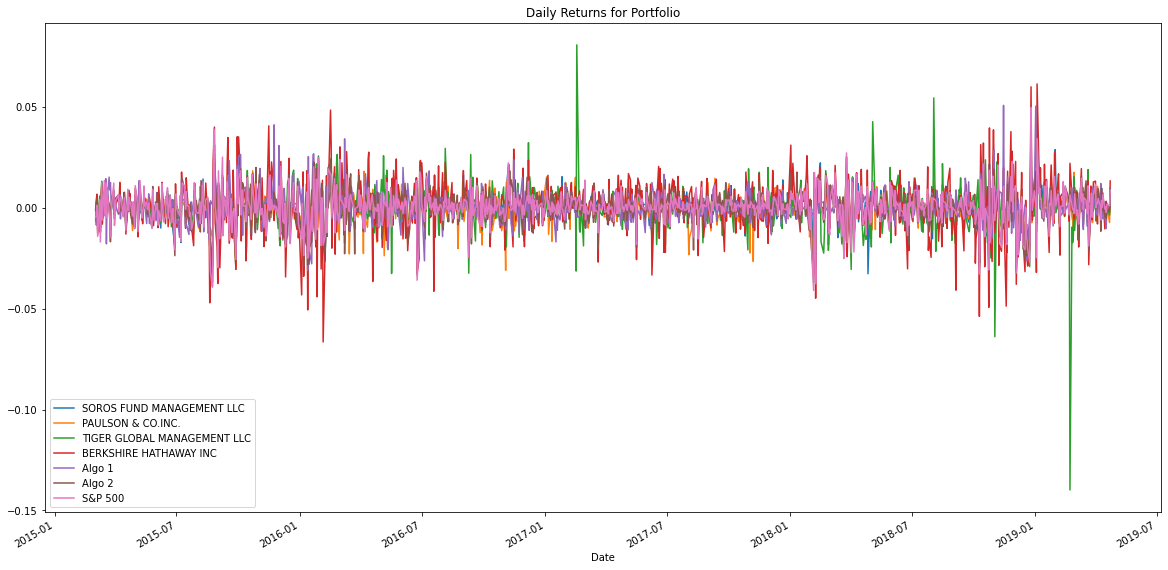

In [22]:
# Plot daily returns of all portfolios
column_append_data.plot(figsize=(20,10),title="Daily Returns for Portfolio")

#### Calculate and Plot cumulative returns.

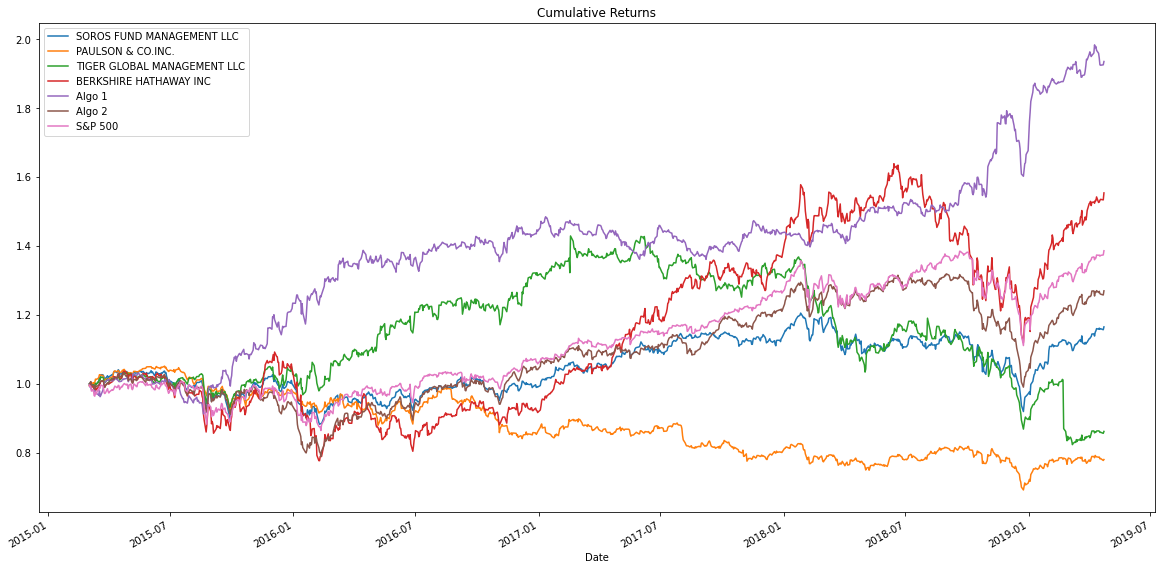

In [23]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ column_append_data).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


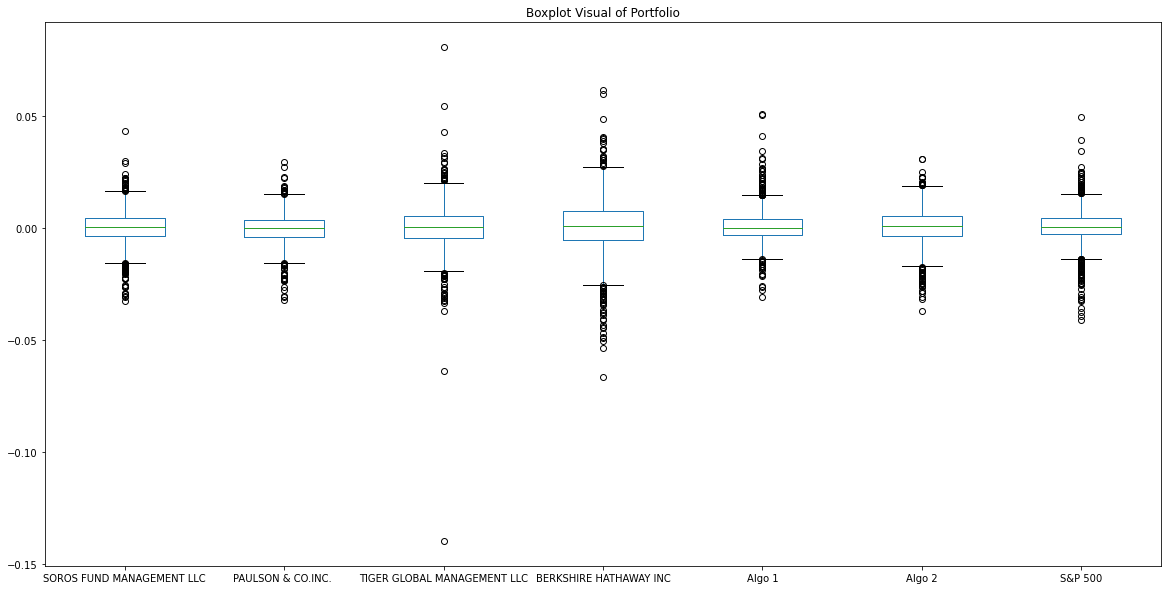

In [24]:
# Box plot to visually show risk
column_append_data.plot.box(figsize=(20,10),title="Boxplot Visual of Portfolio")

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
column_append_data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [26]:
column_append_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


### Determine which portfolios are riskier than the S&P 500

In [27]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = column_append_data["S&P 500"].std()
sp500_risk
# Determine which portfolios are riskier than the S&P 500
column_append_data.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
column_append_data.rolling(window=252).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.009383,0.007333,0.014700,0.015245,0.008211,0.008598,0.009481
2019-04-17,0.009375,0.007339,0.014696,0.015200,0.008240,0.008592,0.009460
2019-04-18,0.009369,0.007337,0.014692,0.015197,0.008228,0.008591,0.009461


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

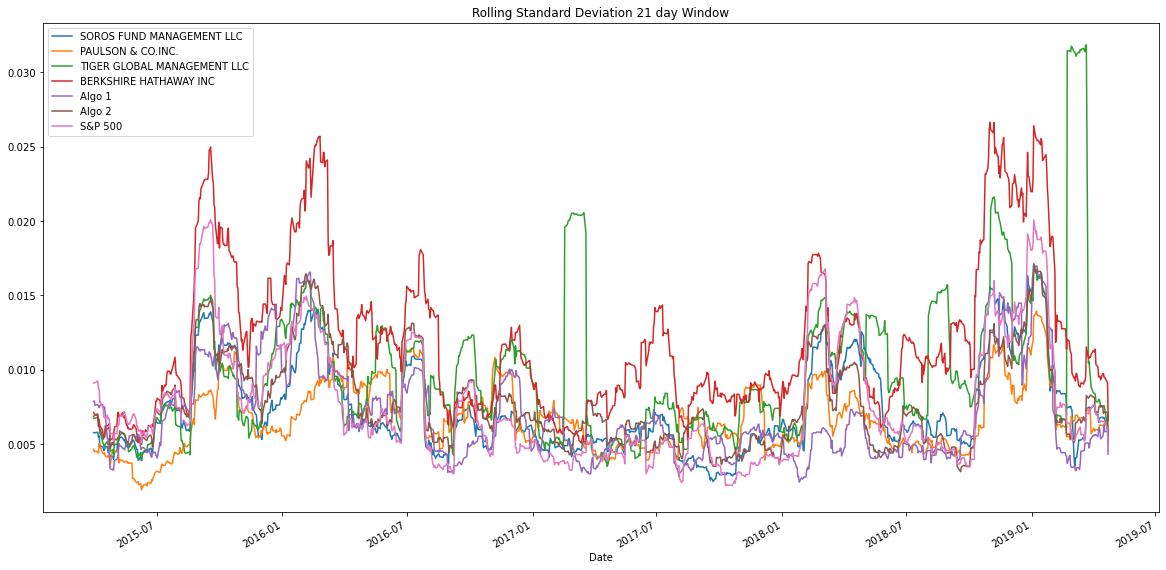

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
column_append_data.rolling(window=21).std()
# Plot the rolling standard deviation
column_append_data.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")


### Calculate and plot the correlation

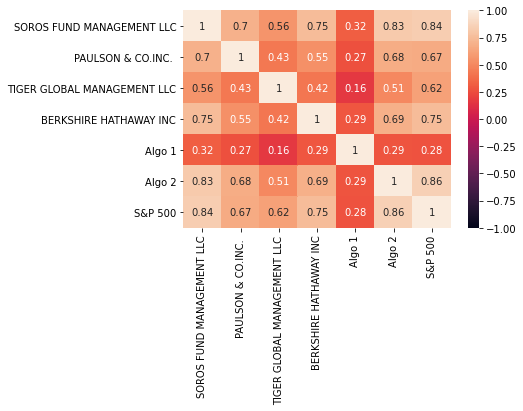

In [40]:
# Calculate the correlation
price_correalation = column_append_data.corr()

# Display de correlation matrix
sns.heatmap(price_correalation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

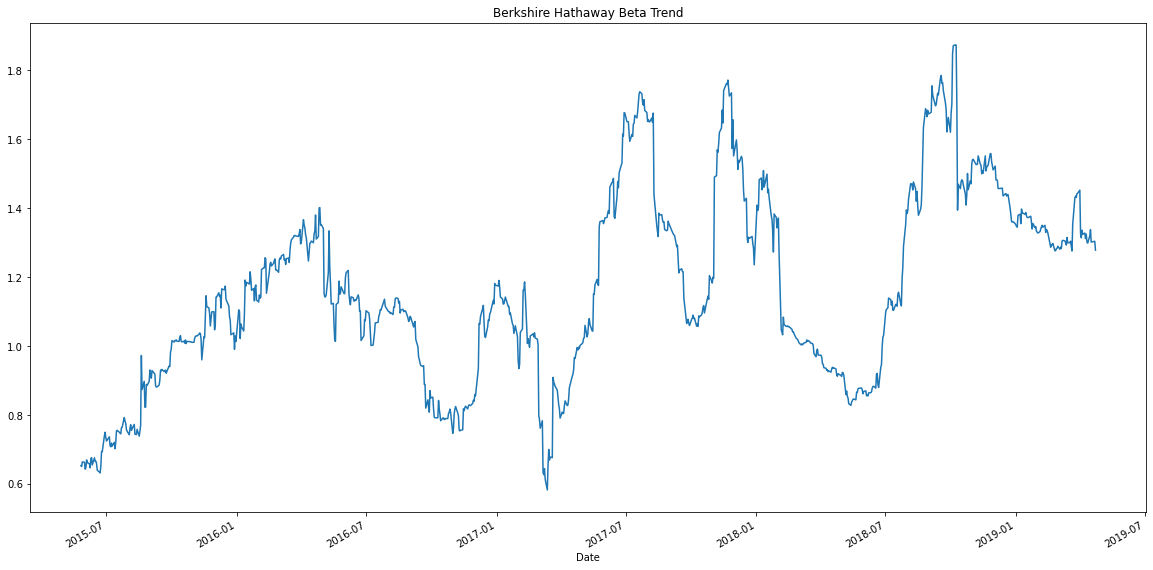

In [31]:
# Calculate covariance of a single portfolio
covariance = column_append_data['BERKSHIRE HATHAWAY INC'].rolling(60).cov(column_append_data["S&P 500"])

# Calculate variance of S&P 500
variance = column_append_data['S&P 500'].rolling(60).var()
# Computing beta
sp500_beta = covariance / variance

# Plot beta trend
sp500_beta.plot(figsize=(20,10), title='Berkshire Hathaway Beta Trend')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [32]:
# Use `ewm` to calculate the rolling window
column_append_data.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std()#.plot(figsize=(20,10),title='Exponential Weighted Moving Average for 21-Day Half-life')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharperatio = (column_append_data.mean()*252)/(column_append_data.std()* np.sqrt(252))
sharperatio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

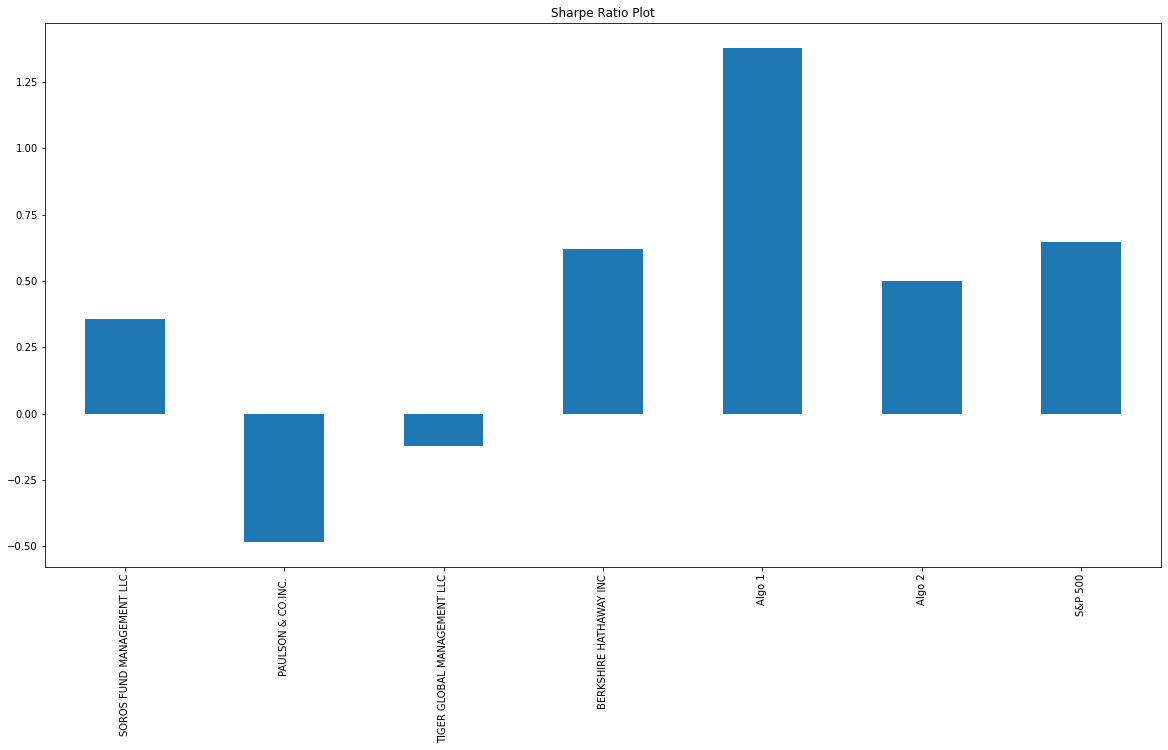

In [34]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind='bar',figsize=(20,10),title='Sharpe Ratio Plot')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer e!


<h3><i>The algorithmic trading strategies outperformed the whaes portfolios. The Algo one did better performance than all of the other portfolios and Algo 2 outperformed all of the portfolios excluding 3. On average the Alogrithmic strategies were stronger.</i></h3>

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [35]:
# Reading data from 1st stock
# Drop the trade date col and make the NOCP column into Symbol
goog_data = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df = goog_df.drop(["Symbol"], axis = 1)
goog_df = goog_df.rename(columns={'NOCP':'GOOG'})
goog_df.sort_values("Trade DATE", ascending=False)
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [48]:
# Reading data from 2nd stock
costco_data = Path("../Starter_Code/Resources/cost_historical.csv")
costco_df = pd.read_csv(costco_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_df = costco_df.drop(["Symbol"], axis=1)
costco_df = costco_df.rename(columns={'NOCP' : 'COST'})
costco_df.sort_values("Trade DATE", ascending=False)
costco_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [50]:
# Reading data from 3rd stock
apple_data = Path("../Starter_Code/Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_df = apple_df.drop(["Symbol"], axis=1)
apple_df = apple_df.rename(columns={'NOCP' : 'AAPL'})
apple_df.sort_values("Trade DATE", ascending=False)
apple_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [51]:
# Combine all stocks in a single DataFrame
all_stock_df = pd.concat([goog_df, costco_df, apple_df], axis="columns", join="inner")
all_stock_df


,GOOG,COST,AAPL
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75
...,...,...,...
2018-05-17,1078.59,199.60,186.99
2018-05-16,1081.77,198.71,188.18
2018-05-15,1079.23,195.48,186.44


In [60]:
# Reset Date index
all_stock_df.sort_index(ascending)

NameError: name 'ascending' is not defined

In [124]:
# Reorganize portfolio data by having a column per symbol
pd.pivot_table(all_stock_df, values=None, index=["Trade DATE"], columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='Symbol', observed=False)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [70]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
# Join your returns DataFrame to the original returns DataFrame


In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [74]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [75]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [76]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [77]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Calculate Annualzied Sharpe Ratios


In [79]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!